# AIPI 590 - XAI | Assignment #06



## Akalpit Dawkhar

### **Explainable Techniques-2**

### Overview

In [9]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Explainable-techniques/Assignment-6/" # Change to your repo name
git_path = 'https://github.com/akalpit23/Explainable-techniques.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment-6/'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: ./sample_data: No such file or directory
Cloning into 'Explainable-techniques'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 114 (delta 54), reused 75 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 4.59 MiB | 4.69 MiB/s, done.
Resolving deltas: 100% (54/54), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.5 MB/s eta 0:00:00
[Errno 2] No such file or directory: 'Explainable-techniques/Assignment-6/Assignment-6/'
/Users/akalpitdawkhar/Desktop/School/SEM 3/XAI/Explainable-techniques/Assignment-6
Explainable-techniques/
Explainable_Techniques_Assignment_06.ipynb
requirements.txt


In [12]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement alepython (from versions: none)
ERROR: No matching distribution found for alepython


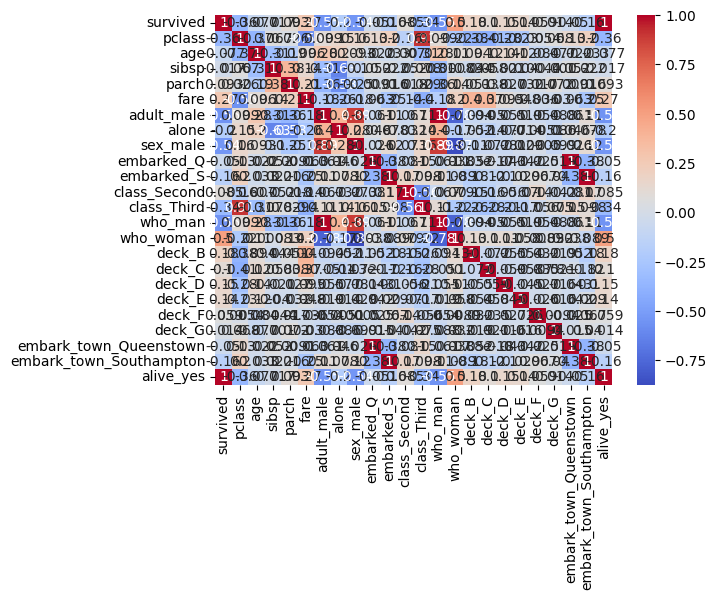

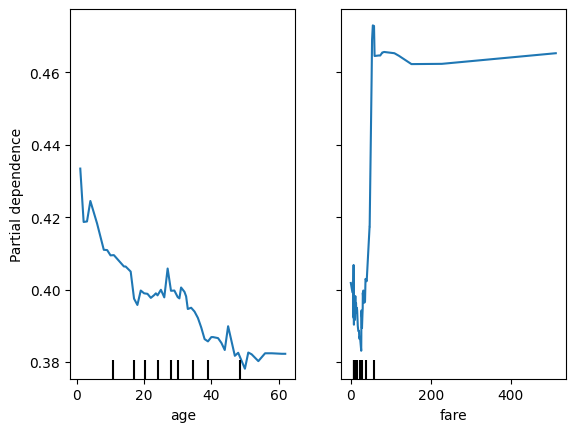

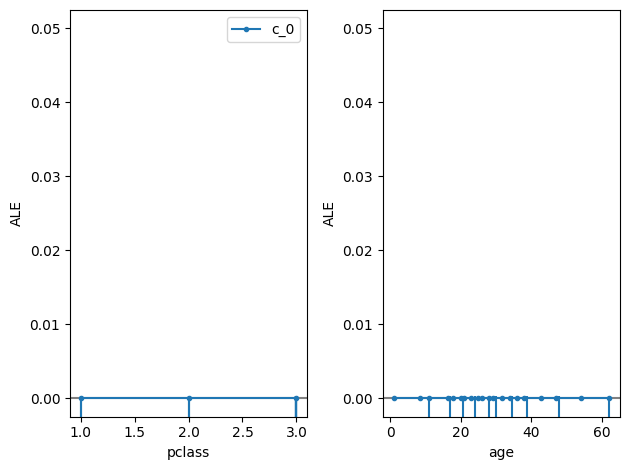

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [17]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import PartialDependenceDisplay  # Updated import
from alibi.explainers import ALE, plot_ale  # Importing ALE and the correct plotting function

# Step 2: Load your dataset
df = sns.load_dataset('titanic')

# Step 3: Exploratory Data Analysis (EDA)

# Convert categorical variables to numerical via one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop rows with missing values for simplicity
df_encoded = df_encoded.dropna()

# Visualize correlation heatmap for numeric columns only
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Step 4: Data Preprocessing
X = df_encoded.drop('survived', axis=1)  # Assuming "survived" is the target variable
y = df_encoded['survived']

# Step 5: Model Selection & Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: PDP, ICE, and ALE Plots

# PDP (Using the updated PartialDependenceDisplay)
features = ['age', 'fare']  # Adjust based on your features
PartialDependenceDisplay.from_estimator(model, X_test, features=features)
plt.show()

# ALE (Using alibi for ALE)
ale_explainer = ALE(model.predict, feature_names=X_test.columns.tolist())
ale_explanation = ale_explainer.explain(X_test.values)

# Plot ALE for the first two features
plot_ale(ale_explanation, features=[0, 1])  # Updated plotting function
plt.show()

# Display model evaluation report (Optional)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))